In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Import the data
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
print(y_train[:10])
print(set(y_train))

[9 0 0 3 0 2 7 2 5 5]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
#     0: T-shirt/top
#     1: Trouser
#     2: Pullover
#     3: Dress
#     4: Coat
#     5: Sandal
#     6: Shirt
#     7: Sneaker
#     8: Bag
#     9: Ankle boot

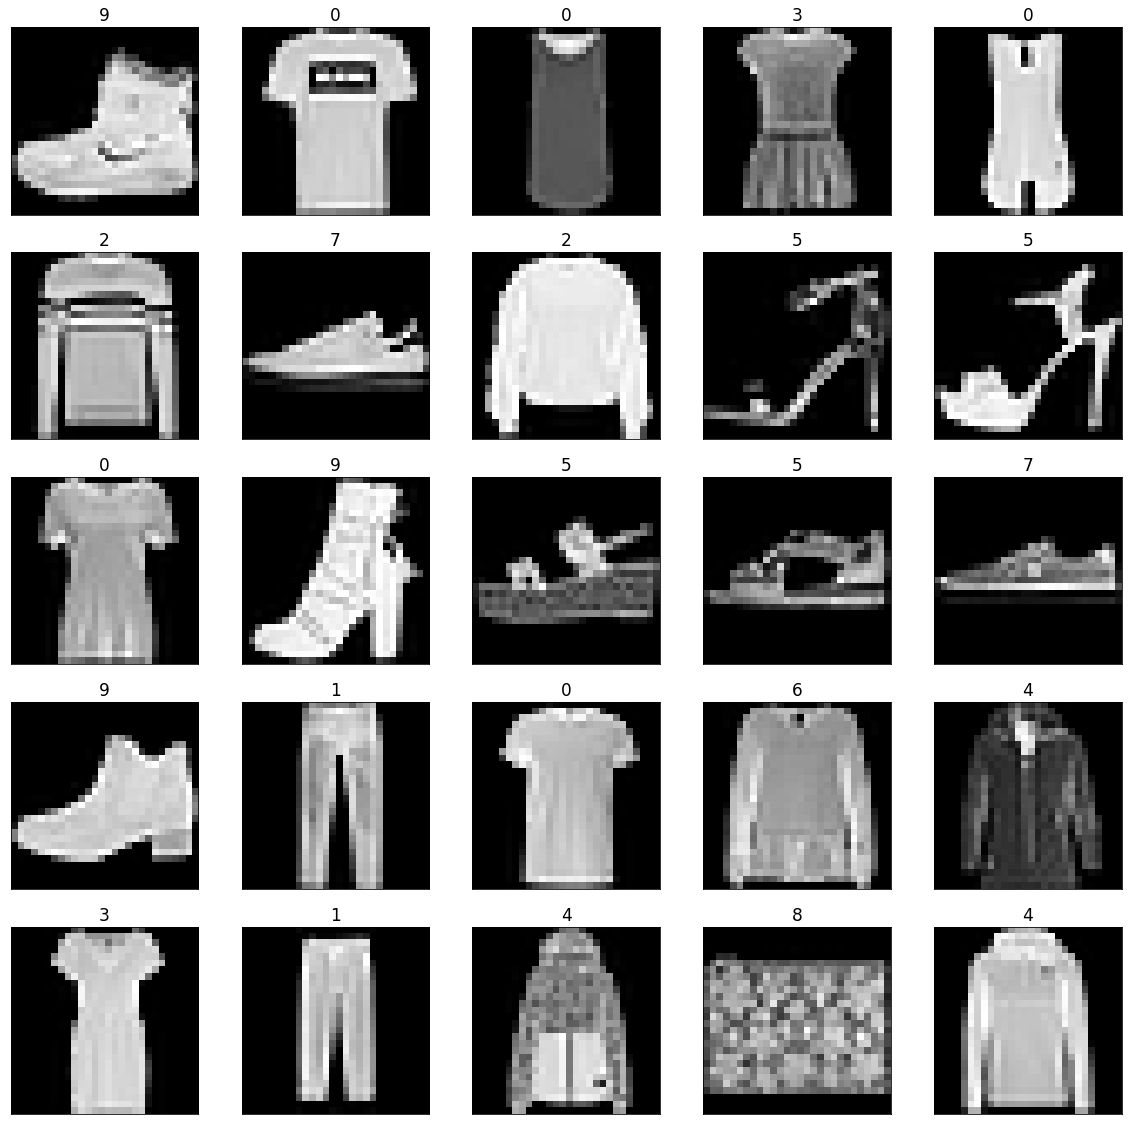

In [ ]:
#@title Plot the Image
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i],fontsize=17)
plt.show()

In [ ]:
#@title Reducing the number of Imgaes for Train and Test
x_train = x_train[:10000,:,:]
x_test = x_test[:3000,:,:]
y_train = y_train[:10000]
y_test = y_test[:3000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28)
(3000, 28, 28)
(10000,)
(3000,)


In [ ]:
#@title 1)Normalize Images by Dividing pixels by 255
x_train = x_train/255
x_test = x_test/255

In [ ]:
#@title 2)Convert labels to categories and 3) Reshape the images so as to fit them to convolution
x_train = x_train.reshape(10000,28,28,1)
x_test = x_test.reshape(3000,28,28,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(3000, 28, 28, 1)
(10000,)
(3000,)


In [ ]:
#@title Import the CNN libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [ ]:
#@title 4) CNN Architecure
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(64,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='acc')

In [ ]:
#@title 5) Model for appropriate number of epochs
h1 = m1.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
313/313 [==============================] - 18s 54ms/step - loss: 1.0848 - acc: 0.6204 - val_loss: 0.7274 - val_acc: 0.7510
Epoch 2/25
313/313 [==============================] - 18s 57ms/step - loss: 0.6674 - acc: 0.7607 - val_loss: 0.6222 - val_acc: 0.7880
Epoch 3/25
313/313 [==============================] - 18s 58ms/step - loss: 0.5915 - acc: 0.7852 - val_loss: 0.5805 - val_acc: 0.7927
Epoch 4/25
313/313 [==============================] - 18s 58ms/step - loss: 0.5343 - acc: 0.8021 - val_loss: 0.5557 - val_acc: 0.8027
Epoch 5/25
313/313 [==============================] - 16s 52ms/step - loss: 0.4926 - acc: 0.8195 - val_loss: 0.5255 - val_acc: 0.8123
Epoch 6/25
313/313 [==============================] - 19s 60ms/step - loss: 0.4606 - acc: 0.8294 - val_loss: 0.5167 - val_acc: 0.8220
Epoch 7/25
313/313 [==============================] - 16s 52ms/step - loss: 0.4433 - acc: 0.8351 - val_loss: 0.5001 - val_acc: 0.8320
Epoch 8/25
313/313 [==============================] - 16s 52ms

In [ ]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
20,0.211261,0.9217,0.517998,0.841333,20
21,0.197147,0.9277,0.484229,0.852333,21
22,0.190092,0.9303,0.510865,0.840667,22
23,0.167854,0.9389,0.527331,0.847333,23
24,0.161027,0.9410,0.517518,0.852667,24


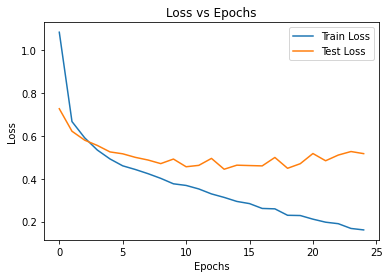

In [ ]:
#@title 6)Depict loss vs. val_loss on line chart
plt.plot(r1['Epochs'],r1['loss'],label='Train Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test Loss')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

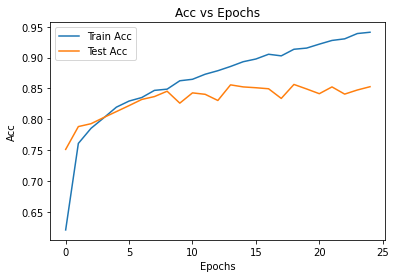

In [ ]:
#@title 7)Depict accuracy vs. val_accuracy on line chart.
plt.plot(r1['Epochs'],r1['acc'],label='Train Acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test Acc')
plt.title('Acc vs Epochs')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
#@title 8) Generate predictions on test_data
ypred = m1.predict(x_test)
print(ypred[:10])

94/94 [==============================] - 3s 26ms/step
[[8.13190498e-13 1.28042840e-13 1.42635827e-12 5.05307710e-13
  7.65950380e-15 3.67017674e-06 1.95556615e-09 7.46193342e-04
  2.71684786e-09 9.99250174e-01]
 [1.84931705e-05 2.66243005e-05 9.99937475e-01 7.73984112e-08
  1.55228349e-06 1.35483413e-11 1.57680297e-05 1.28028800e-13
  2.25070860e-08 5.37717980e-18]
 [9.05661171e-11 9.99999940e-01 2.60381459e-08 1.60583511e-08
  2.53724168e-12 1.57473894e-16 2.47984332e-15 1.04348747e-22
  2.91430985e-12 2.59375119e-24]
 [2.43378402e-08 9.99995530e-01 3.17880040e-06 1.18593823e-06
  1.63239133e-09 1.72344593e-12 3.14706733e-10 6.56847104e-16
  4.74894186e-11 2.45611497e-17]
 [4.23031917e-04 4.85440432e-06 4.80515063e-02 6.34647720e-03
  1.01591974e-01 8.83313922e-10 8.43514383e-01 6.73770992e-05
  3.52767330e-07 1.54878263e-10]
 [1.32150308e-08 9.99995768e-01 3.48483286e-06 7.70240320e-07
  6.13143980e-09 3.41442234e-14 7.84537539e-12 8.00208217e-19
  1.23429378e-10 1.10296748e-20]
 [3.

In [ ]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 8, 8, 0, 2, 7, 7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 1, 6, 8, 0, 7, 5, 7, 9, 6, 1, 6, 9, 4, 7, 2, 1, 2, 6, 4, 6, 5, 6, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 5, 1, 2, 0, 0, 1, 6, 1, 3, 2, 2, 2, 1, 1, 6, 5, 2, 6, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 6, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 2, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 2, 2, 8, 6, 2, 6, 2, 9, 7, 6, 5, 5, 6, 8, 5, 2, 3, 0, 6, 8, 0, 0, 6, 3, 8, 9, 6, 1, 2, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 3, 3, 3, 6, 8, 0, 0, 2, 9, 7, 9, 1, 3, 2, 6, 2, 4, 9, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 2, 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#@title 9) Compute Confusion matrix and classification report
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[233   0  18   8   0   0  42   0   1   0]
 [  2 296   0   8   2   0   0   0   0   0]
 [  3   0 264   3  15   0  25   0   0   0]
 [ 10   3  10 252   6   0  15   0   1   1]
 [  1   1  30  12 235   0  43   0   2   0]
 [  0   0   0   0   0 277   0   6   1   1]
 [ 34   0  38  10  27   0 185   0   4   0]
 [  0   0   0   0   0  16   0 267   0  10]
 [  0   0   6   1   2   4   5   0 278   1]
 [  0   0   0   1   0   4   0   9   0 271]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       302
           1       0.99      0.96      0.97       308
           2       0.72      0.85      0.78       310
           3       0.85      0.85      0.85       298
           4       0.82      0.73      0.77       324
           5       0.92      0.97      0.95       285
           6       0.59      0.62      0.60       298
           7       0.95      0.91      0.93       293
           8       0.97      0.94      0.95       297
           9       0.95     

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train2,y_train2),(x_test2,y_test2) = cifar10.load_data()
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
#     0: airplane
#     1: automobile
#     2: bird
#     3: cat
#     4: deer
#     5: dog
#     6: frog
#     7: horse
#     8: ship
#     9: truck

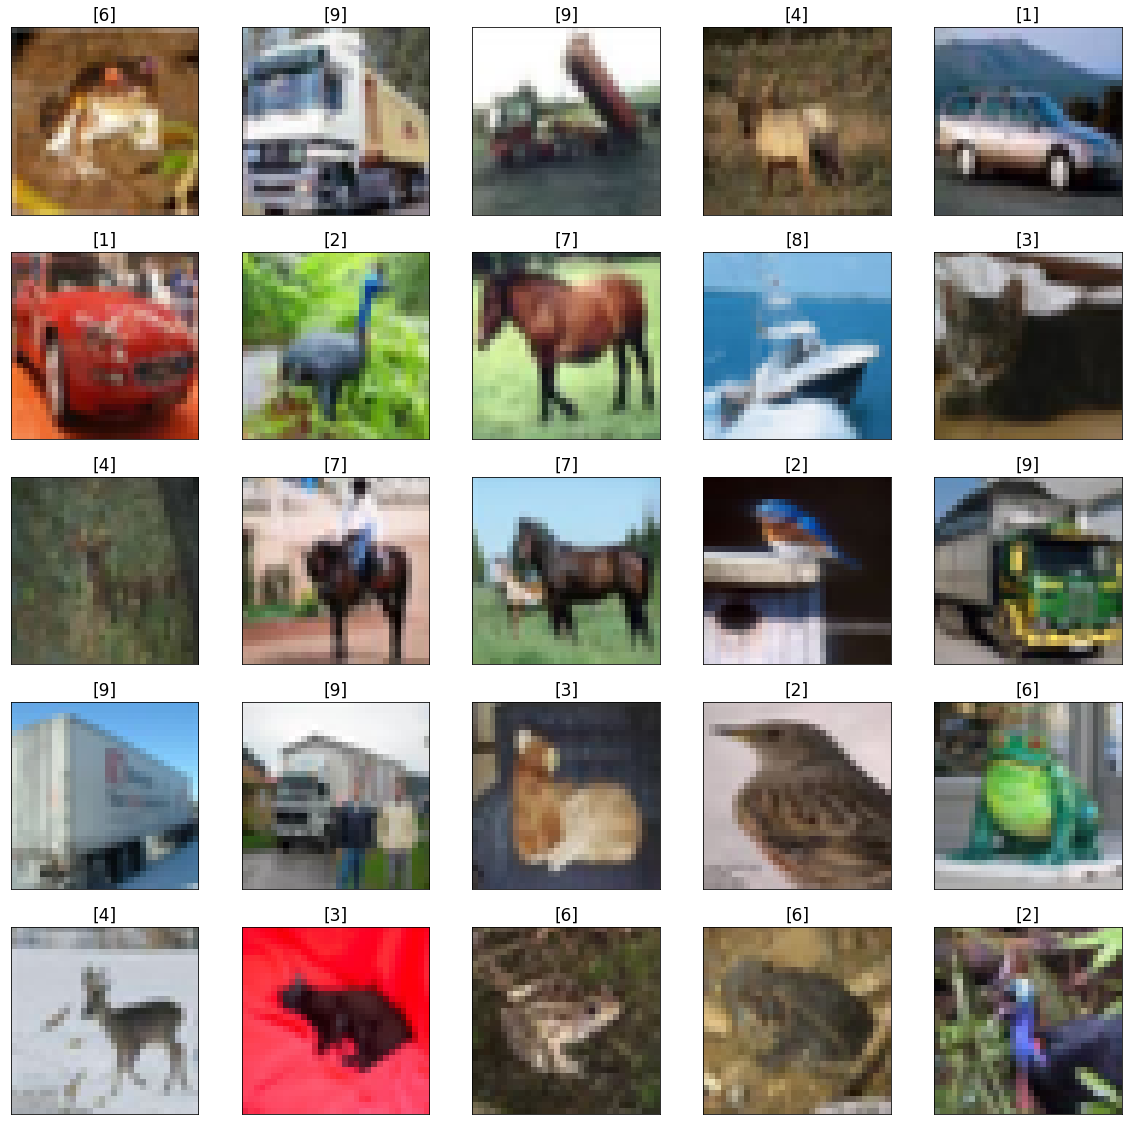

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train2[i],'gray')
    plt.title(y_train2[i],fontsize=17)
plt.show()